## Exercício de Apoio Semana 01

Neste exercício, use o conjunto de dados sobre avaliações de carros para criar um modelo de classificação usando Árvores de Decisão com Python. 
Os dados contêm seis atributos que são considerados para classificar os carros em diferentes níveis de aceitabilidade.

##### Faça os seguintes passos:

- Separe os dados em treinamento e teste.
- Plote a árvore de decisão gerada.
- Calcule a acurácia de classificação obtido pelo modelo gerado.

O conjunto de dados contém os atributos seus possíveis valores descritos a seguir, e está disponível no link abaixo:

[__BAIXAR CSV: s1carros-avaliacao.csv__](https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/carros-avaliacao.csv)

##### Atributos:

| **ATRIBUTOS**                  | **VALUES**                                  | **DESCRIÇÃO**           |
| ------------------------------ | ------------------------------------------- | ----------------------- |
| preco                          | `muito alto` `alto` `medio` `baixo`         | preço do carro          |
| manutencao                     | `muito alto` `alto` `medio` `baixo`         | preço de manutenção     |
| portas                         | `2` `3` `4` `5+`                            | quantidade de portas    |
| pessoas                        | `2` `4` `5+`                                | quantidade de pessoas   |
| bagageiro                      | `grande` `medio` `pequeno`                  | tamanho do bagageiro    |
| seguranca                      | `alta` `media` `baixa`                      | segurança do carro      |
| aceitabilidade (atributo-alvo) | `inaceitavel` `aceitavel` `bom` `muito bom` | nível de aceitabilidade |

##### Observações:

A Videoaula 11 (Métodos de classificação supervisionada), da disciplina COM360 - Mineração de Dados, contém exemplos de criação de árvores de decisão com a biblioteca scikit-learn. Assista no link abaixo:

[__Mineração de Dados - Métodos de classificação supervisionadas__](https://www.youtube.com/watch?v=A-v9Rqv_TP0)

O dataset deste exercício é baseado no dataset Car Evaluation, que está em:

[__Car Evaluation__](https://archive.ics.uci.edu/dataset/19/car+evaluation)


In [15]:
# IMPORTs
# from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

In [16]:
# Pegando os dados
import pandas as pd

url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/carros-avaliacao.csv'

carros = pd.read_csv(url)

carros.head()

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
0,muitoalto,muitoalto,2,2,pequeno,baixa,inaceitavel
1,muitoalto,muitoalto,2,2,pequeno,media,inaceitavel
2,muitoalto,muitoalto,2,2,pequeno,alta,inaceitavel
3,muitoalto,muitoalto,2,2,medio,baixa,inaceitavel
4,muitoalto,muitoalto,2,2,medio,media,inaceitavel


In [18]:
# Transformando os atributos em números para uso na Árvore de Decisão

carros['preco'] = carros['preco'].map({'muitoalto':3,'alto':2,'medio':1,'baixo':0})
carros['manutencao'] = carros['manutencao'].map({'muitoalto':3,'alto':2,'medio':1,'baixo':0})
carros['portas'] = carros['portas'].map({'2':2,'3':3,'4':4,'5mais':5})
carros['pessoas'] = carros['pessoas'].map({'2':2,'4':4,'5mais':5})
carros['bagageiro'] = carros['bagageiro'].map({'grande':2,'medio':1,'pequeno':0})
carros['seguranca'] = carros['seguranca'].map({'alta':2,'media':1,'baixa':0})
carros.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
0,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
1,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
2,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
3,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
4,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
5,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
6,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
7,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
8,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel
9,NaN,NaN,NaN,NaN,NaN,NaN,inaceitavel


In [19]:
# Separando atributos e classes para o treinamento e teste

atributos_nomes = ['preco','manutencao','portas','pessoas','bagageiro','seguranca']

print(f'{atributos_nomes}\n')

atributos = carros[atributos_nomes]

print(f'{atributos.head()}\n')

classes = carros['aceitabilidade']

print(classes.head())

['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca']

   preco  manutencao  portas  pessoas  bagageiro  seguranca
0    NaN         NaN     NaN      NaN        NaN        NaN
1    NaN         NaN     NaN      NaN        NaN        NaN
2    NaN         NaN     NaN      NaN        NaN        NaN
3    NaN         NaN     NaN      NaN        NaN        NaN
4    NaN         NaN     NaN      NaN        NaN        NaN

0    inaceitavel
1    inaceitavel
2    inaceitavel
3    inaceitavel
4    inaceitavel
Name: aceitabilidade, dtype: object


In [20]:
# Separando o conjunto de dados para treinamento e teste

atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size=0.1, random_state=10)

print(f'Atributos de treino:\n{atributos_treino.head()}\n')
print(f'Atributos de teste:\n{atributos_teste.head()}\n')
print(f'Classes de treino:\n{classes_treino.head()}\n')
print(f'Classes de teste:\n{classes_teste.head()}\n')

Atributos de treino:
      preco  manutencao  portas  pessoas  bagageiro  seguranca
1670    NaN         NaN     NaN      NaN        NaN        NaN
454     NaN         NaN     NaN      NaN        NaN        NaN
384     NaN         NaN     NaN      NaN        NaN        NaN
822     NaN         NaN     NaN      NaN        NaN        NaN
537     NaN         NaN     NaN      NaN        NaN        NaN

Atributos de teste:
      preco  manutencao  portas  pessoas  bagageiro  seguranca
954     NaN         NaN     NaN      NaN        NaN        NaN
115     NaN         NaN     NaN      NaN        NaN        NaN
1422    NaN         NaN     NaN      NaN        NaN        NaN
35      NaN         NaN     NaN      NaN        NaN        NaN
1579    NaN         NaN     NaN      NaN        NaN        NaN

Classes de treino:
1670       muitobom
454     inaceitavel
384     inaceitavel
822     inaceitavel
537     inaceitavel
Name: aceitabilidade, dtype: object

Classes de teste:
954     inaceitavel
115    

In [21]:
# Criando o modelo

arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos_treino,classes_treino)

print(arvore)

DecisionTreeClassifier()


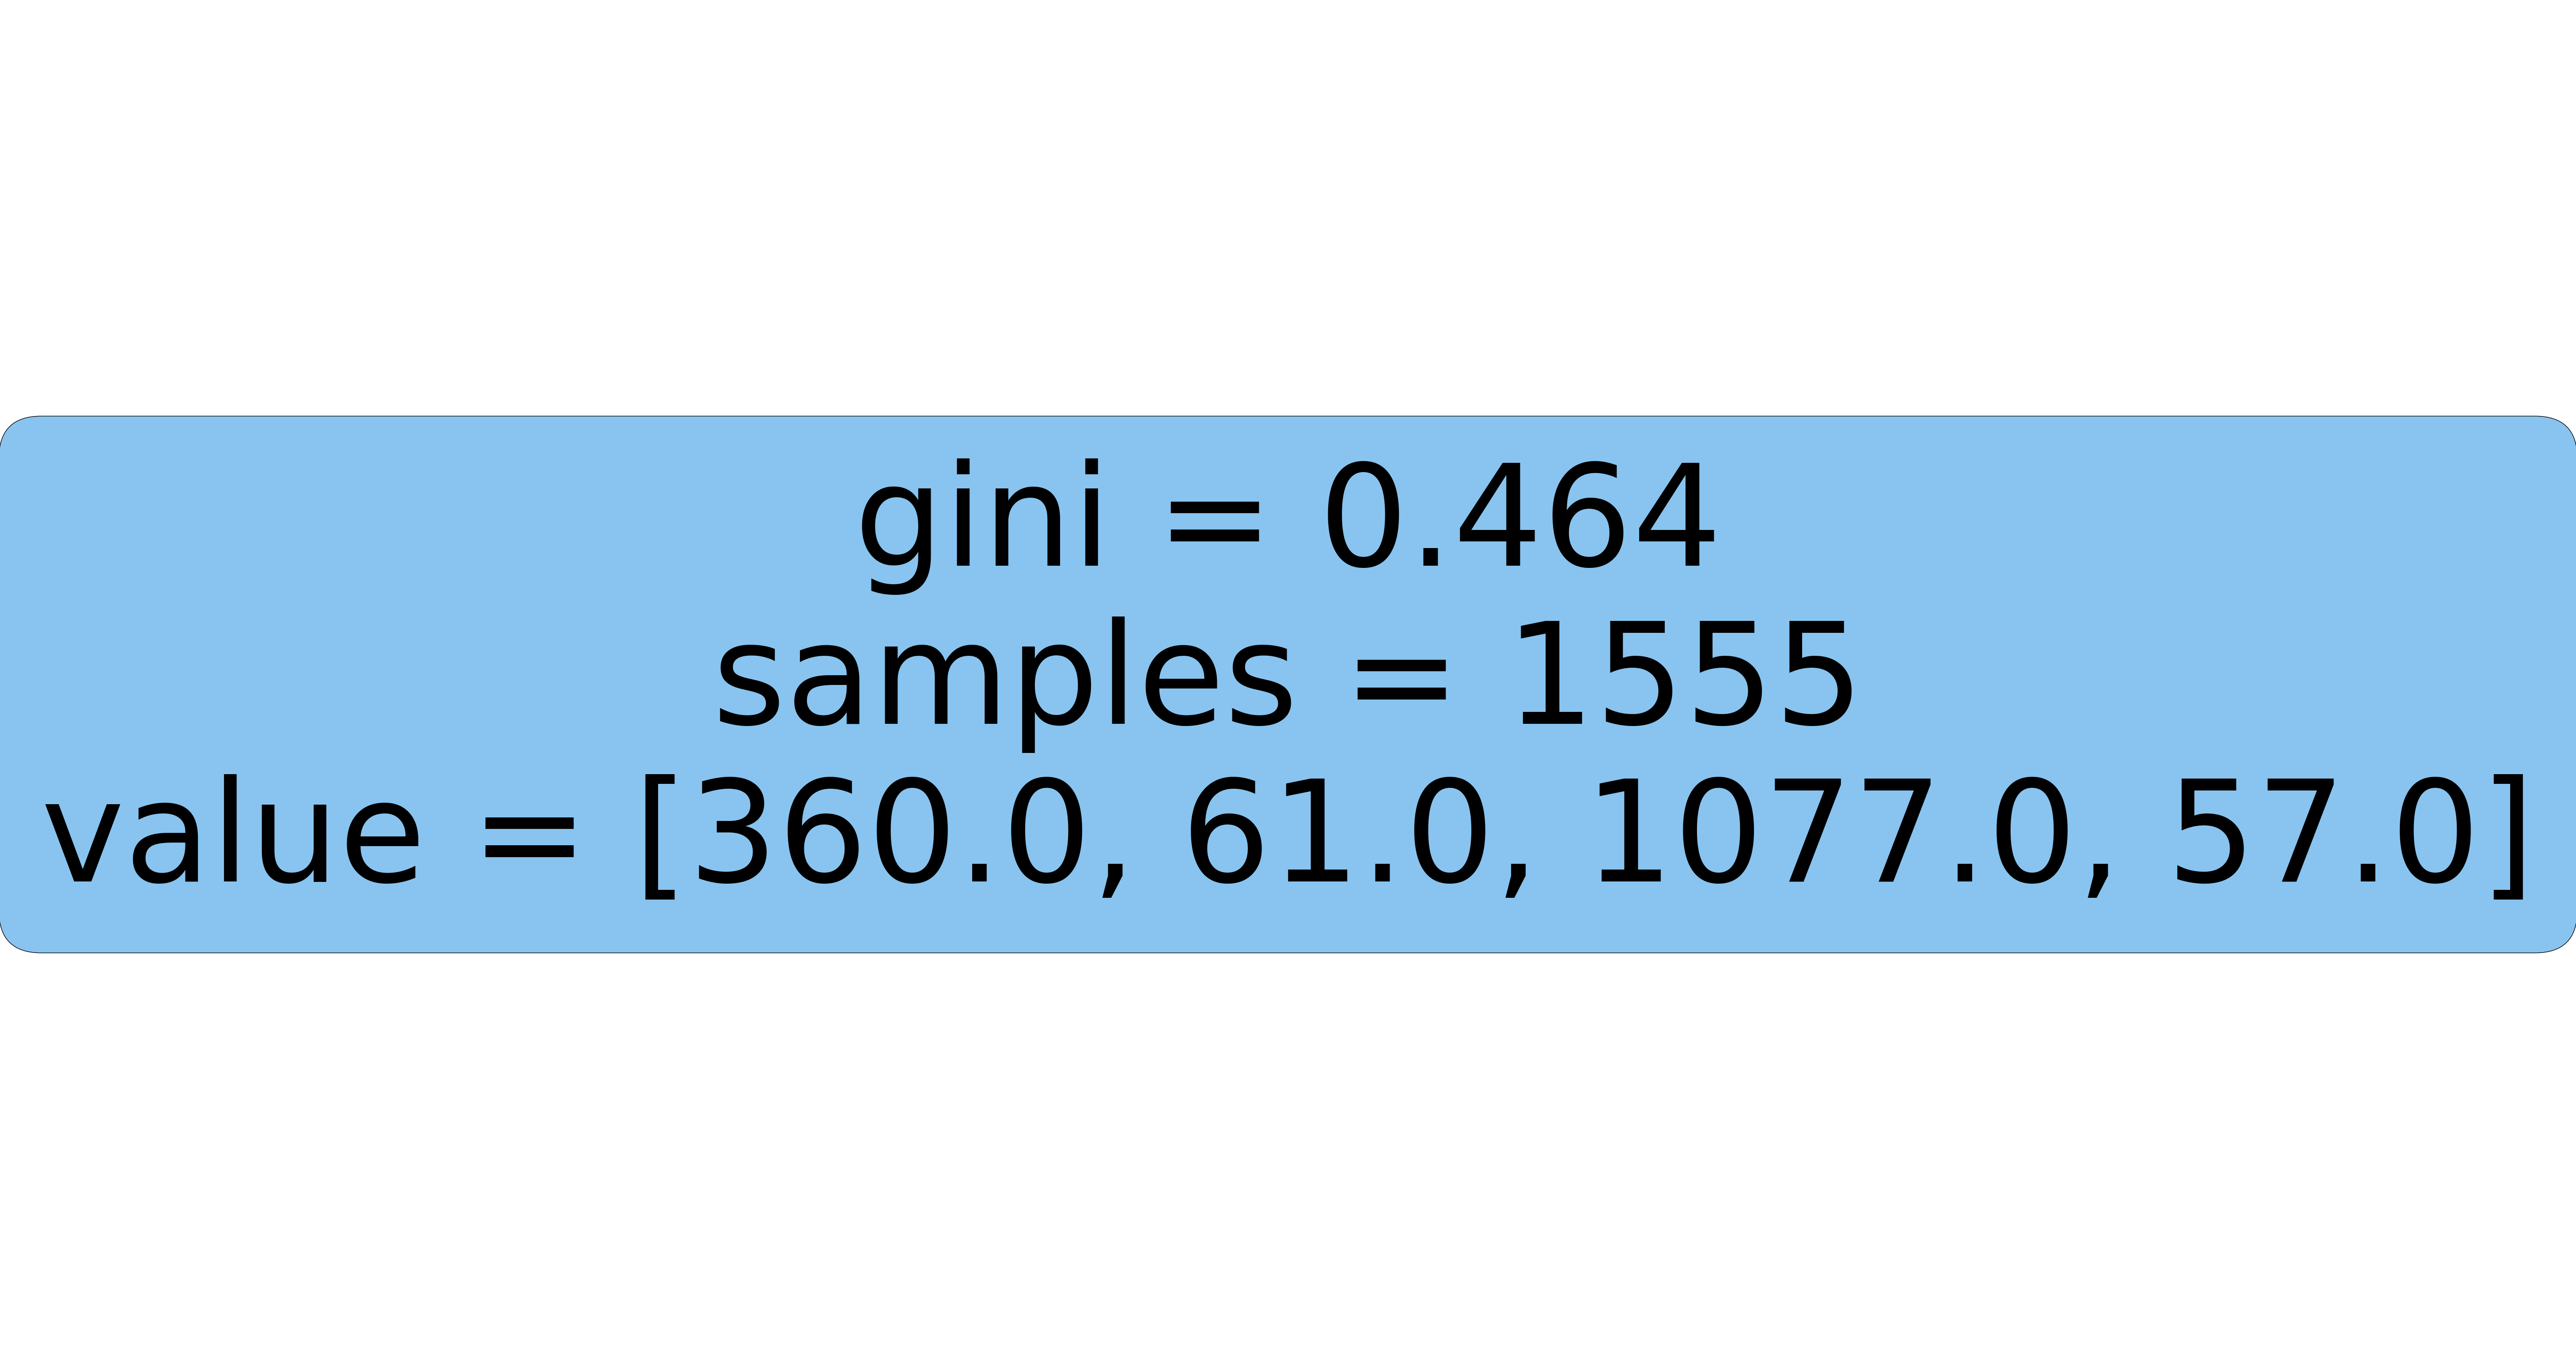

In [29]:
# Plotando a árvore de decisão em tamanho grande para conseguir visualizar em detalhes. No caderno Python, clique na figura para alternar entre visão ampliada e reduzida.

plt.figure(figsize=(75,40))
plot_tree(arvore, filled=True, rounded=True, feature_names=atributos_nomes)

plt.show()

In [30]:
# Testando o caso perfeito em que todos os valores são os melhores possíveis.

print(arvore.predict([[0,0,5,5,2,2]]))

['muitobom']

['inaceitavel']


c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['muitobom']

In [31]:
# Basta que a segurança seja baixa para que seja classificada como inaceitável.

print(arvore.predict([[0,0,5,5,2,0]]))

['inaceitavel']

['inaceitavel']


c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['inaceitavel']

In [32]:
# Verificando a acurácia de classificação.

classes_predicao = arvore.predict(atributos_teste)

acuracia = accuracy_score(classes_teste,classes_predicao)

print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

# Acurácia de classificação: 98.3%*
# * O valor de acurácia pode variar um pouco dependendo do modelo gerado.

Acurácia de classificação: 76.9%
